### (1) 서론

**Gauss 소거법은 연립방정식을 푸는 가장 익숙한 방법**
- 소거 단계와 후방대입의 두 부분으로 이루어짐
    - 1. 소거 단계의 기능은 주어진 연립방정식을 Ux = c 형태로 만드는 것
    - 2. Ux = c를 후방대입으로 푼다

### 소거 단계

**피봇방정식 (pivot equation) : 기본 조작 중 하나를 이용해 만든 방정식**

- 원 방정식은 후방대입에 의해 쉽게 풀 수 있는 등가 방정식으로 바뀜
- 이후 확대계수행렬을 이용해 계산을 편하게 진행할 수 있음
- 삼각행렬의 행렬식은 대각 요소의 곱으로 매우 쉽게 계산할 수 있음
    - |A| = |U| = U11 x U22 x ... x Unn

### 후방대입 단계

- 소거 단계 이후 후방대입법을 활용해 연립일차방정식의 해를 구할 수 있다

### (2) Gauss 소거법의 알고리즘

### 소거 단계

**계수행렬 A의 처음 k번째 행까지 상삼각행렬로 변환되었다고 가정**
- 현재의 피봇방정식은 k번째 방정식. 그 아래의 모든 방정식은 아직 변환이 되지 않았음
    - 이 방정식은 다음의 확대계수행렬로 나타낼 수 있음
    - 소거 과정에서 계수행렬이 변경. 첫 번째 행만 제외하고 A의 요소는 원 방정식의 계수가 아님
    - 똑같은 과정이 상수벡터 b에도 적용

**전체 계수행렬을 상삼각행렬로 바꾸려면?**
- k와 i의 범위는 각각 k = 1, 2, ..., n - 1 (피봇행의 선택)
- i = k + 1, k + 2, ..., n (변환될 행의 선택)

In [ ]:
for k in range(0, n - 1):
    # k + 1에서 시작하기 때문에 Aik는 0으로 바뀌지 않고 원래 값으로 남게 된다
    for i in range(k + 1, n):
        # 만일 Aik가 0이면, i행의 변환은 건너뛴다
        if a[i, k] != 0.0:
            lam = a[i, k] / a[k, k]
            a[i, k + 1 : n] = a[i, k + 1 : n] - lam * a[k, k + 1 : n]
            b[i] = b[i] - lam * b[k]

### 후방대입 단계

**Gauss 소거 후의 확대계수행렬**

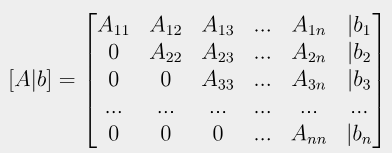

- 마지막 방정식 Annxn = bn을 가장 먼저 풀어 xn을 구함
- 후방대입 단계에서 xn, xn - 1, ..., xk + 1을 계산하고 다음의 k번째 방정식에서 xk를 계산함

In [ ]:
x[n - 1] = b[n - 1] / A[n - 1][n - 1]
for k in range(n - 1, -1, -1):
    x[k] = (b[k] - dot(a[k, k + 1 : n], x[k + 1 : n])) / a[k, k]

### 연산 횟수

**Gauss 소거법의 연산 횟수**
- 소거 단계에서 n^3 / n
- 후방 대입에서 n^2 / 2

### GaussElimin() 함수

In [8]:
# Gauss 소거법의 예

import numpy as np
from GaussElimin import *

if __name__ == '__main__':
    A = np.array([[6.0, -4.0, 1.0],
                  [-4.0, 6.0, -4.0],
                  [1.0, -4.0, 6.0]])
    b = np.array([-14.0, 36.0, 6.0])
    
    AOrig = A.copy()
    bOrig = b.copy()
    
    x = GaussElimin(A, b, True)
    
    print('\n계산 결과: \nx = \n', x)
    print('\n결과 확인: [A]{x} - b = \n', np.dot(AOrig, x) - bOrig)

전방 소거 후
 6.000e+00   -4.000e+00    1.000e+00   |   -1.400e+01
-4.000e+00    3.333e+00   -3.333e+00   |    2.667e+01
 1.000e+00   -3.333e+00    2.500e+00   |    3.500e+01

계산 결과: 
x = 
 [10. 22. 14.]

결과 확인: [A]{x} - b = 
 [0.00000000e+00 1.42108547e-14 0.00000000e+00]


In [9]:
# Vandermonde 행렬

import numpy as np
from GaussElimin import *

def Vandermonde(v):
    n = len(v)
    A = np.zeros((n, n))
    for j in range(n):
        A[:, j] = v**(n - j - 1)
    return A

if __name__ == '__main__':
    v = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    b = np.array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0])
    A = Vandermonde(v)
    
    AOrig = A.copy()
    bOrig = b.copy()
    
    x = GaussElimin(A, b)
    det = np.prod(np.diagonal(A))
    
    print('\n계산 결과: x = \n', x)
    print('\ndet = {0: 10.3e}'.format(det))
    print('\n결과 확인: [a]{x} - b =\n', np.dot(AOrig, x) - bOrig)


계산 결과: x = 
 [   416.66666667  -3125.00000004   9250.00000012 -13500.00000017
   9709.33333345  -2751.00000003]

det = -1.132e-06

결과 확인: [a]{x} - b =
 [ 9.09494702e-13  1.81898940e-12  3.63797881e-12  1.09139364e-11
 -2.54658516e-11  3.63797881e-11]


- 행렬식이 요소에 비해 매우 작은 값이므로, 유의할 만한 마무리오차가 생김
- 엄밀해는 다음과 같음
    - x = [1250/3 - 3125, 9250 - 13500, 29128/3 - 2751]^T
    - 이 경우 수치해는 소수점 아래 열자리까지 정확